In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
sns.set(rc={'figure.figsize':(11.7,8.27)})
PlotDeb = False


In [2]:
df = pd.read_csv('./Data/training.csv')
df = df.drop('EventId',axis=1)
df['Label'] = df['Label'].map({'s' : 1, 'b' : 0})

In [3]:
if PlotDeb == True:
    for i in df.columns: 
        pass
        sns.displot(df[i])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1192.026
-999.0


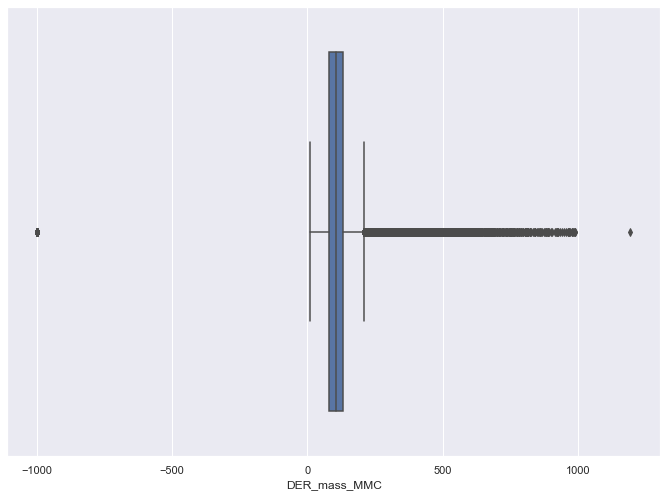

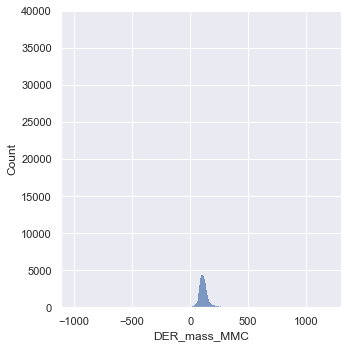

In [4]:
sns.boxplot(df['DER_mass_MMC'])
sns.displot(df['DER_mass_MMC'])
print(df['DER_mass_MMC'].max())
print(df['DER_mass_MMC'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


187.97799999999998
33.001


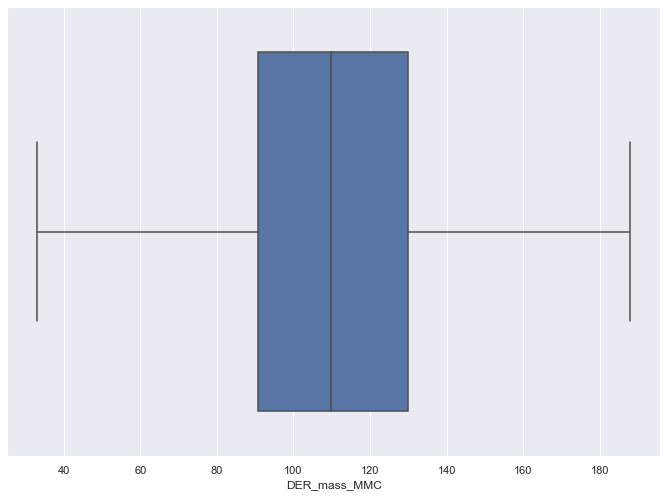

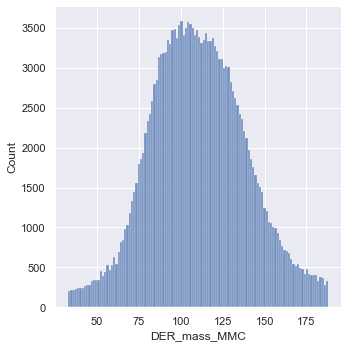

In [5]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['DER_mass_MMC'] > 33) & (dfTest['DER_mass_MMC'] < 188)]
sns.boxplot(dfTest['DER_mass_MMC'])
sns.displot(dfTest['DER_mass_MMC'])
print(dfTest['DER_mass_MMC'].max())
print(dfTest['DER_mass_MMC'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


444.719
0.0


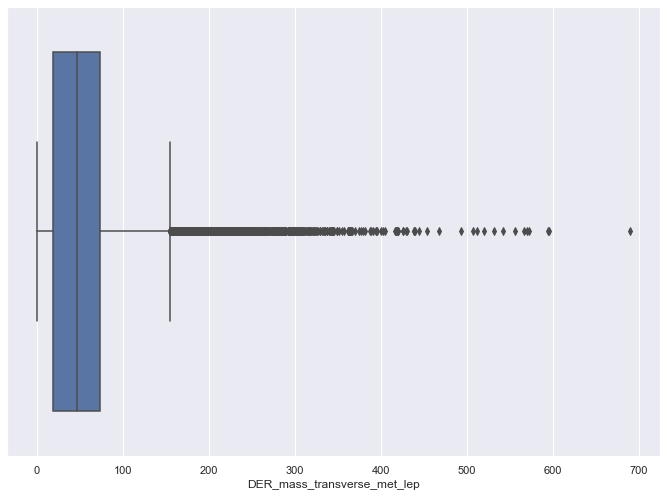

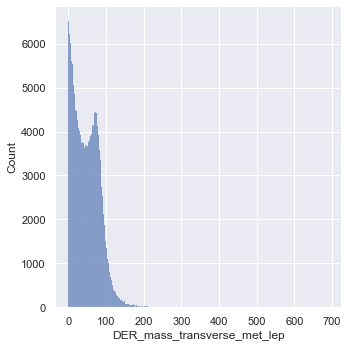

In [6]:
sns.boxplot(df['DER_mass_transverse_met_lep'])
sns.displot(df['DER_mass_transverse_met_lep'])
print(dfTest['DER_mass_transverse_met_lep'].max())
print(dfTest['DER_mass_transverse_met_lep'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


153.955
0.0


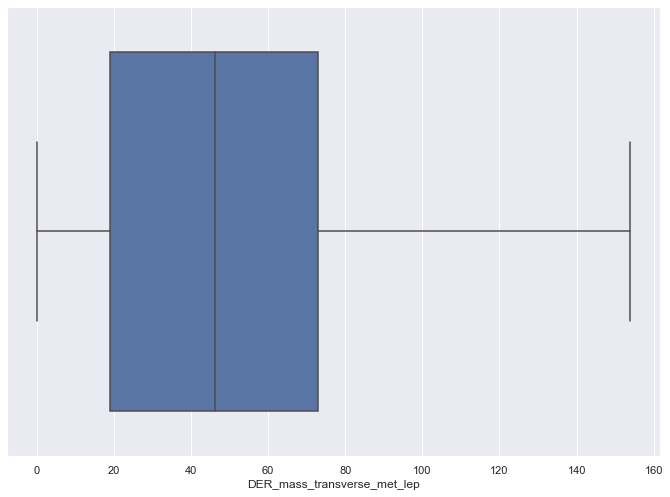

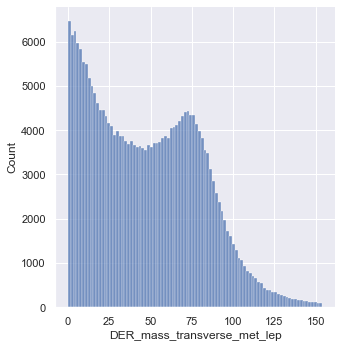

In [7]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['DER_mass_transverse_met_lep'] < 154)]
sns.boxplot(dfTest['DER_mass_transverse_met_lep'])
sns.displot(dfTest['DER_mass_transverse_met_lep'])
print(dfTest['DER_mass_transverse_met_lep'].max())
print(dfTest['DER_mass_transverse_met_lep'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1349.351
6.329


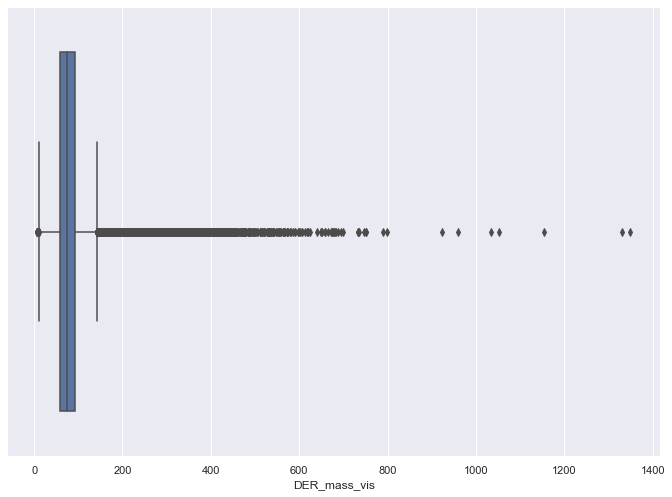

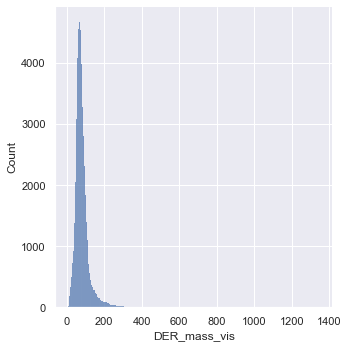

In [8]:
sns.boxplot(df['DER_mass_vis'])
sns.displot(df['DER_mass_vis'])
print(df['DER_mass_vis'].max())
print(df['DER_mass_vis'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


129.998
15.005


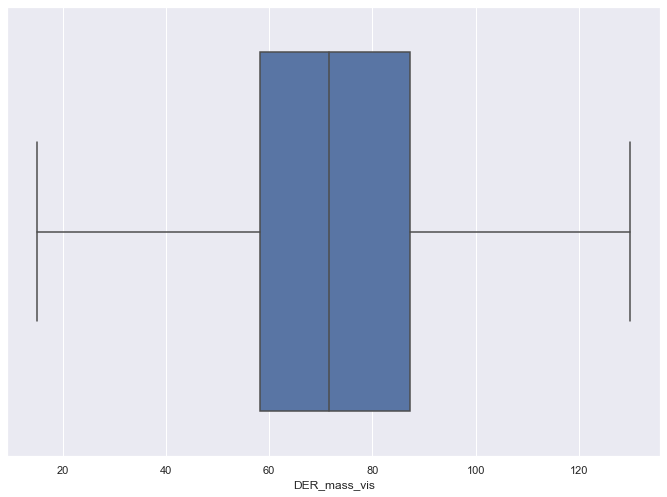

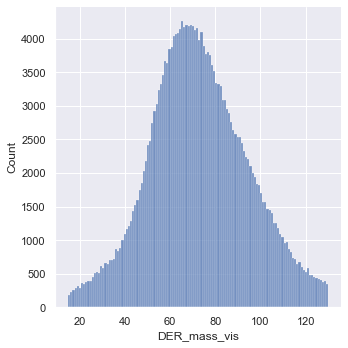

In [9]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['DER_mass_vis'] < 130) & (dfTest['DER_mass_vis'] > 15)]
sns.boxplot(dfTest['DER_mass_vis'])
sns.displot(dfTest['DER_mass_vis'])
print(dfTest['DER_mass_vis'].max())
print(dfTest['DER_mass_vis'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2834.9990000000003
0.0


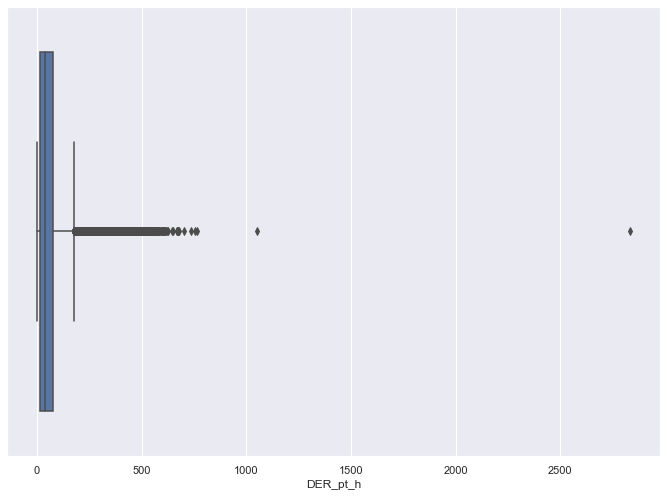

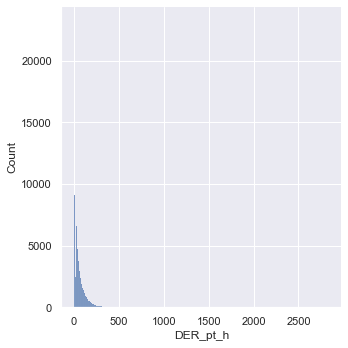

In [10]:
sns.boxplot(df['DER_pt_h'])
sns.displot(df['DER_pt_h'])
print(df['DER_pt_h'].max())
print(df['DER_pt_h'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


147.998
0.0


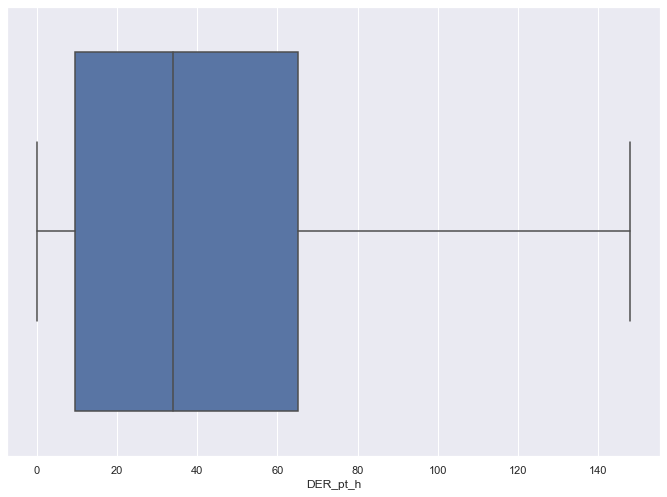

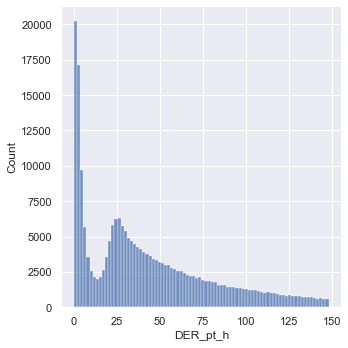

In [11]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['DER_pt_h'] < 148)]
sns.boxplot(dfTest['DER_pt_h'])
sns.displot(dfTest['DER_pt_h'])
print(dfTest['DER_pt_h'].max())
print(dfTest['DER_pt_h'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


4974.979
-999.0


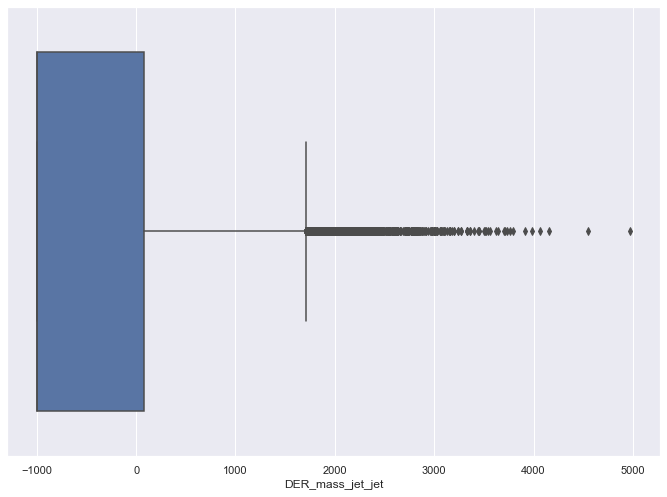

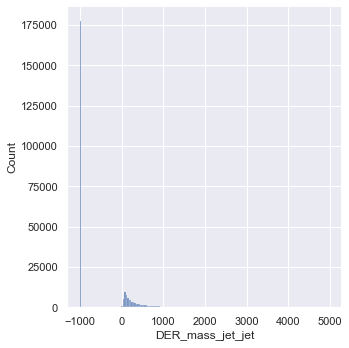

In [12]:
sns.boxplot(df['DER_mass_jet_jet'])
sns.displot(df['DER_mass_jet_jet'])
print(df['DER_mass_jet_jet'].max())
print(df['DER_mass_jet_jet'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


684.955
13.602


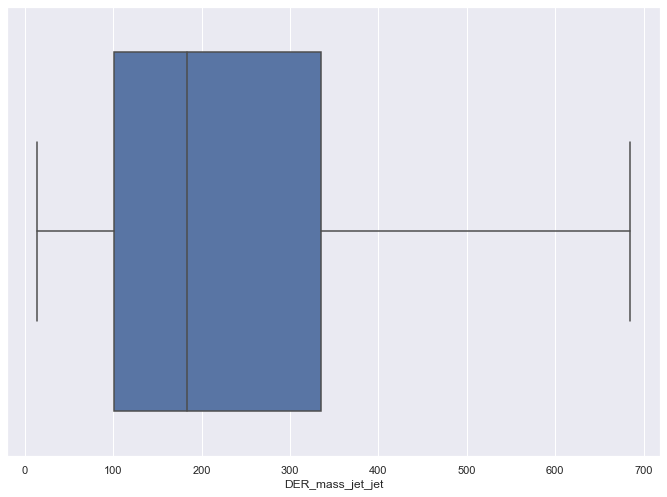

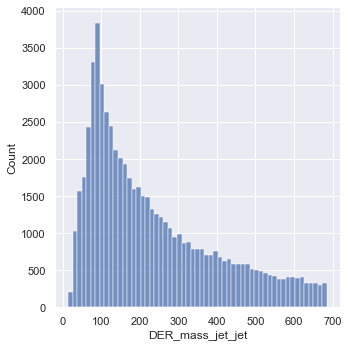

In [13]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['DER_mass_jet_jet'] < 685) & (dfTest['DER_mass_jet_jet'] > 0)] #Обрезание снизу потенциально опасно!!!
sns.boxplot(dfTest['DER_mass_jet_jet'])
sns.displot(dfTest['DER_mass_jet_jet'])
print(dfTest['DER_mass_jet_jet'].max())
print(dfTest['DER_mass_jet_jet'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2834.9990000000003
0.0


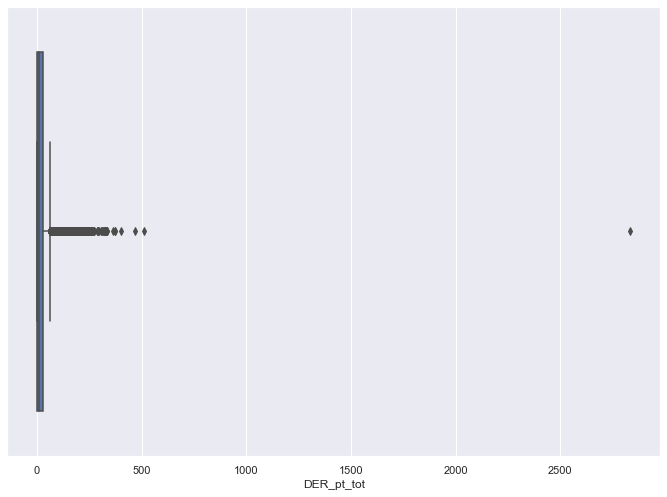

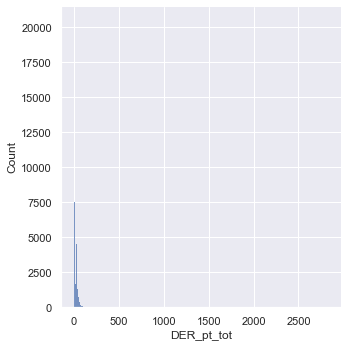

In [14]:
sns.boxplot(df['DER_pt_tot'])
sns.displot(df['DER_pt_tot'])
print(df['DER_pt_tot'].max())
print(df['DER_pt_tot'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


60.998999999999995
0.0


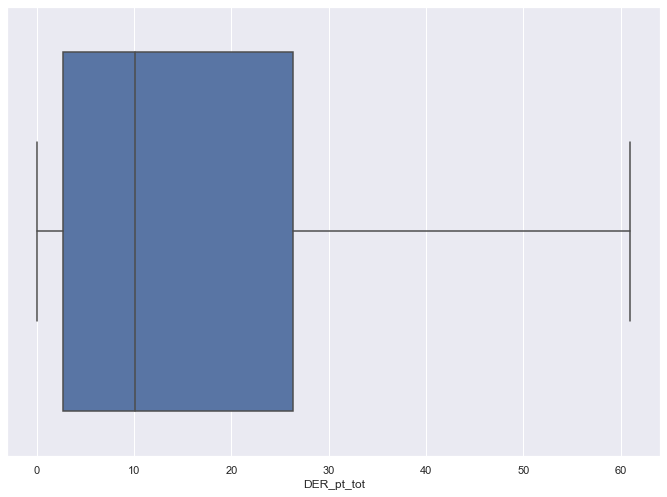

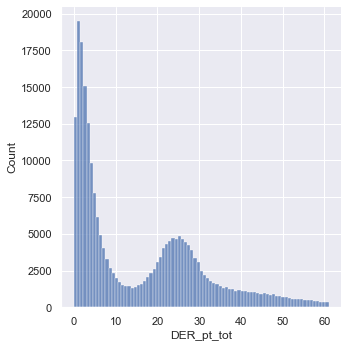

In [15]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['DER_pt_tot'] < 61)]
sns.boxplot(dfTest['DER_pt_tot'])
sns.displot(dfTest['DER_pt_tot'])
print(dfTest['DER_pt_tot'].max())
print(dfTest['DER_pt_tot'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1852.4620000000002
46.104


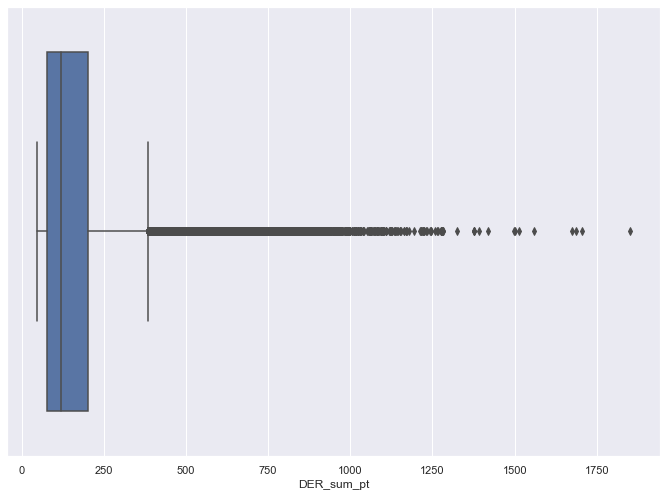

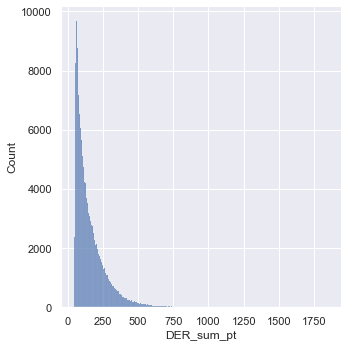

In [16]:
sns.boxplot(df['DER_sum_pt'])
sns.displot(df['DER_sum_pt'])
print(df['DER_sum_pt'].max())
print(df['DER_sum_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


324.986
46.104


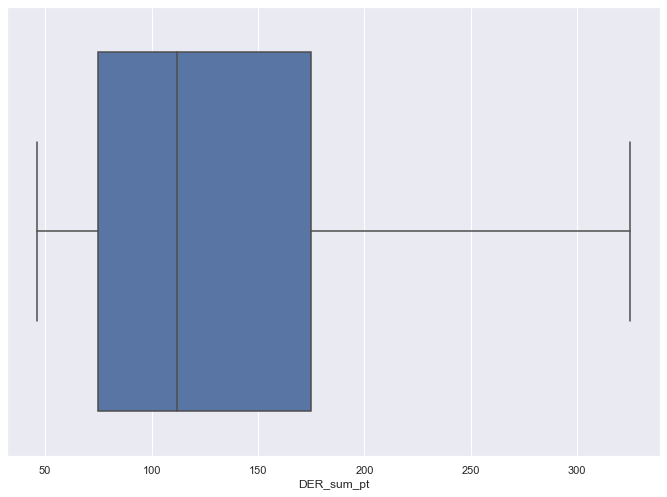

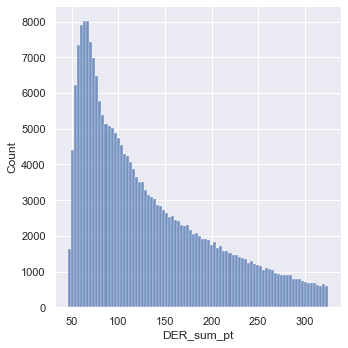

In [17]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['DER_sum_pt'] < 325)]
sns.boxplot(dfTest['DER_sum_pt'])
sns.displot(dfTest['DER_sum_pt'])
print(dfTest['DER_sum_pt'].max())
print(dfTest['DER_sum_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


19.773
0.047


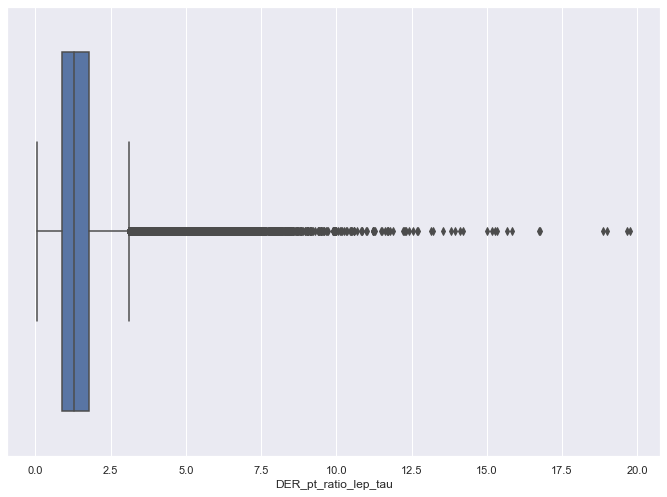

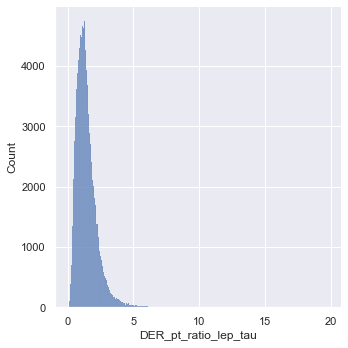

In [18]:
sns.boxplot(df['DER_pt_ratio_lep_tau'])
sns.displot(df['DER_pt_ratio_lep_tau'])
print(df['DER_pt_ratio_lep_tau'].max())
print(df['DER_pt_ratio_lep_tau'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.9989999999999997
0.047


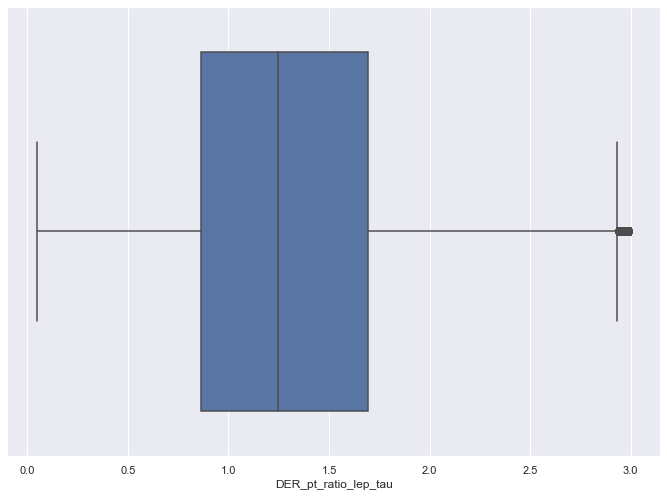

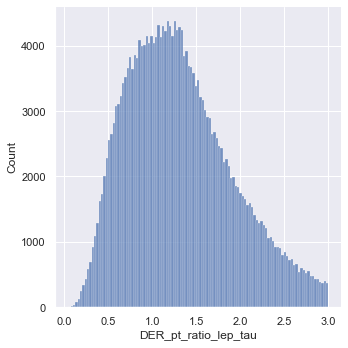

In [19]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['DER_pt_ratio_lep_tau'] < 3)]
sns.boxplot(dfTest['DER_pt_ratio_lep_tau'])
sns.displot(dfTest['DER_pt_ratio_lep_tau'])
print(dfTest['DER_pt_ratio_lep_tau'].max())
print(dfTest['DER_pt_ratio_lep_tau'].min())

1.0
-999.0


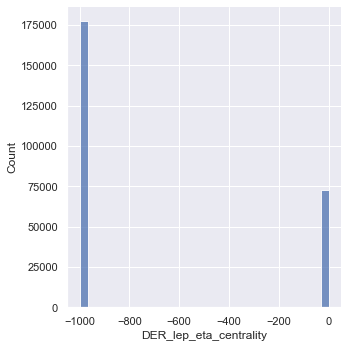

In [20]:
sns.displot(df['DER_lep_eta_centrality'])
print(df['DER_lep_eta_centrality'].max())
print(df['DER_lep_eta_centrality'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0
0.0


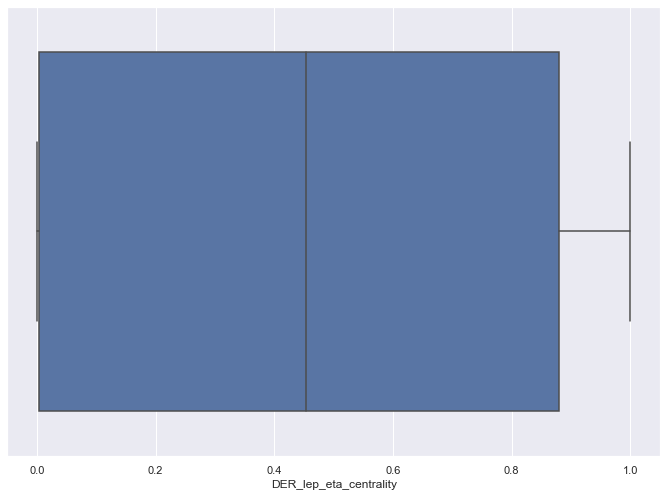

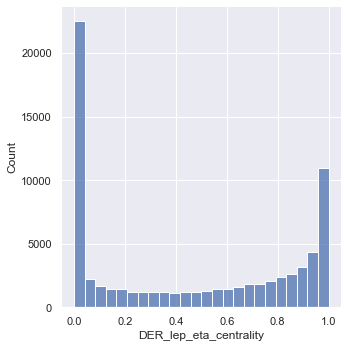

In [21]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['DER_lep_eta_centrality'] > -1)]
sns.boxplot(dfTest['DER_lep_eta_centrality'])
sns.displot(dfTest['DER_lep_eta_centrality'])
print(dfTest['DER_lep_eta_centrality'].max())
print(dfTest['DER_lep_eta_centrality'].min())

764.408
20.0


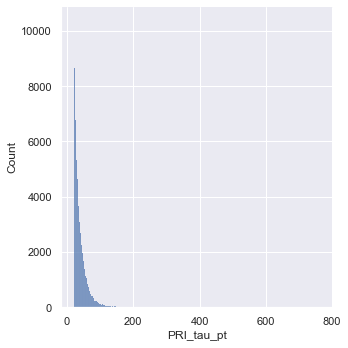

In [22]:
sns.displot(df['PRI_tau_pt'])
print(df['PRI_tau_pt'].max())
print(df['PRI_tau_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


63.996
20.0


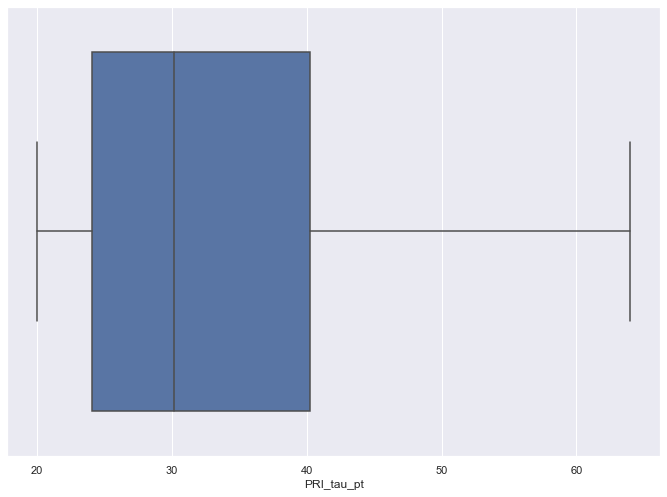

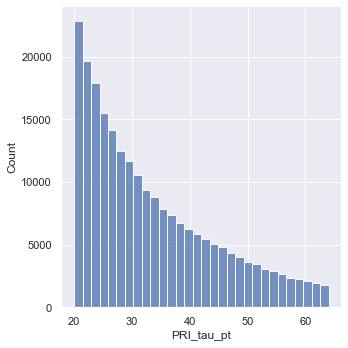

In [23]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['PRI_tau_pt'] < 64)]
sns.boxplot(dfTest['PRI_tau_pt'])
sns.displot(dfTest['PRI_tau_pt'],bins=30)
print(dfTest['PRI_tau_pt'].max())
print(dfTest['PRI_tau_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


560.271
26.0


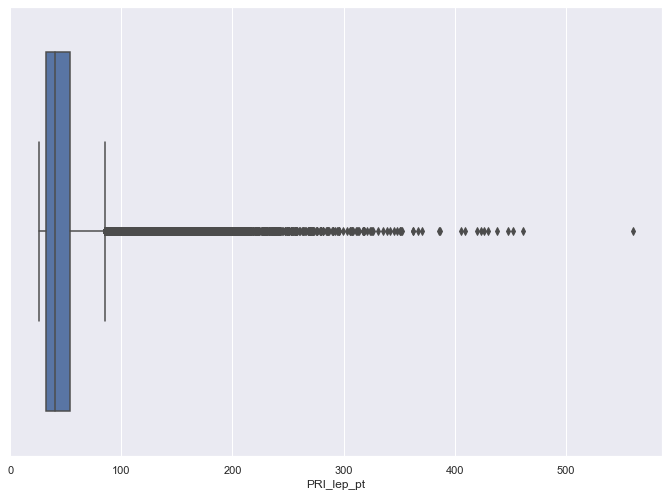

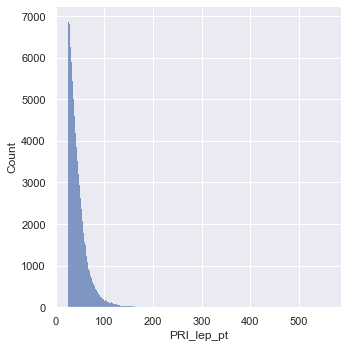

In [24]:
sns.boxplot(df['PRI_lep_pt'])
sns.displot(df['PRI_lep_pt'])
print(df['PRI_lep_pt'].max())
print(df['PRI_lep_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


75.99600000000001
26.0


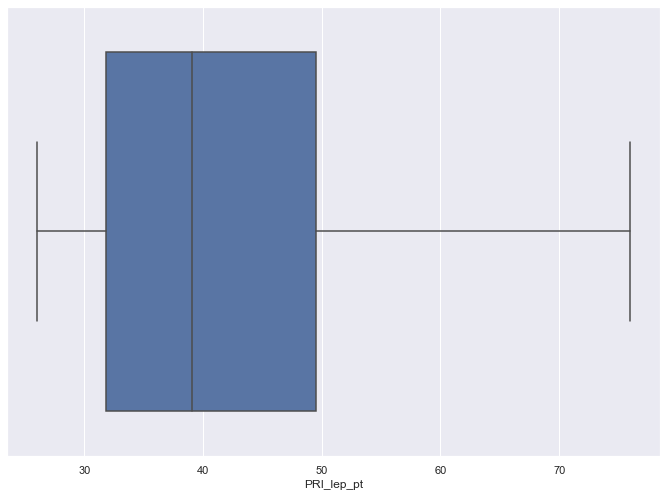

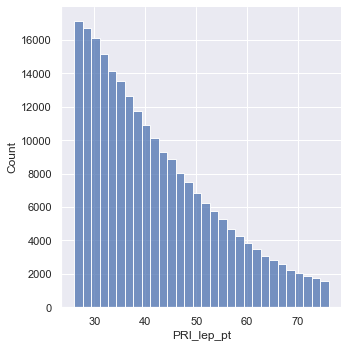

In [25]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['PRI_lep_pt'] < 76)]
sns.boxplot(dfTest['PRI_lep_pt'])
sns.displot(dfTest['PRI_lep_pt'],bins=30)
print(dfTest['PRI_lep_pt'].max())
print(dfTest['PRI_lep_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2842.617
0.109


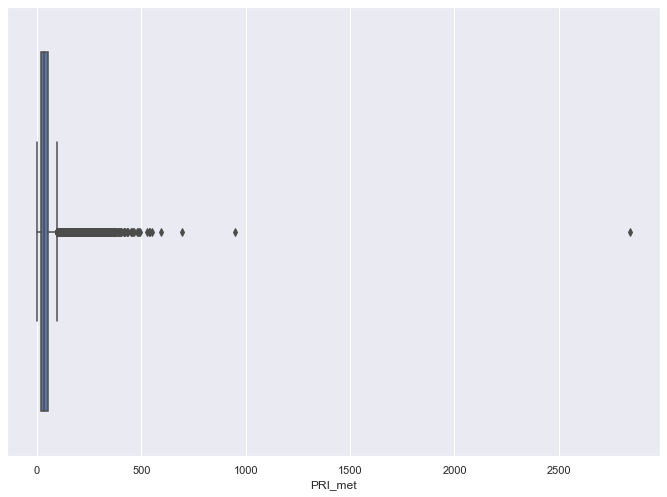

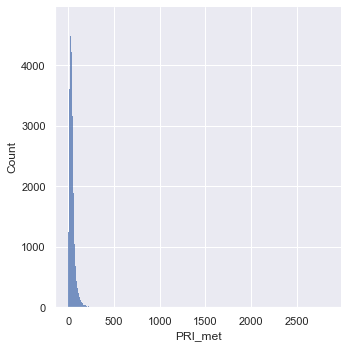

In [26]:
sns.boxplot(df['PRI_met'])
sns.displot(df['PRI_met'])
print(df['PRI_met'].max())
print(df['PRI_met'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


87.999
0.109


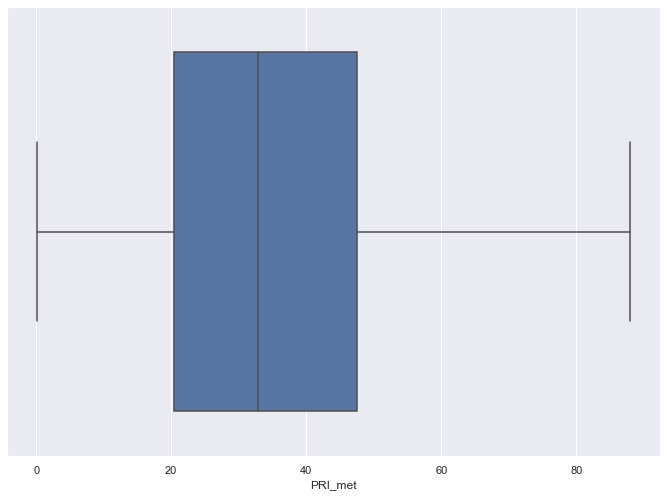

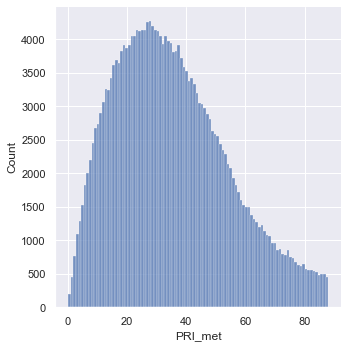

In [27]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['PRI_met'] < 88)]
sns.boxplot(dfTest['PRI_met'])
sns.displot(dfTest['PRI_met'])
print(dfTest['PRI_met'].max())
print(dfTest['PRI_met'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2003.976
13.677999999999999


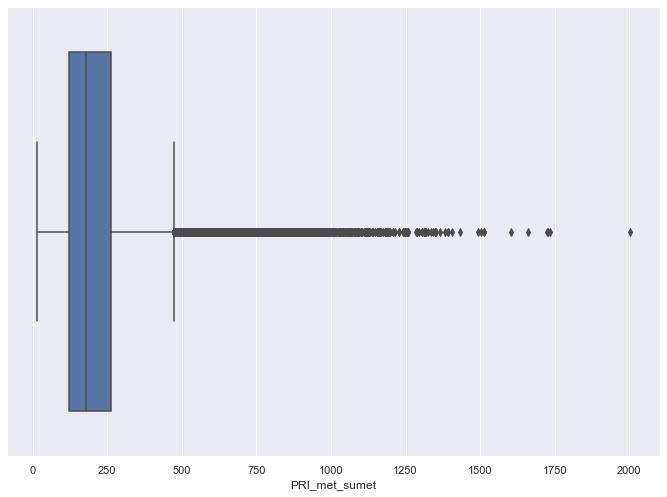

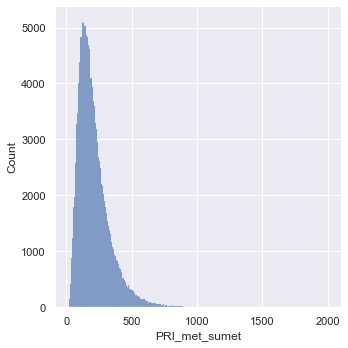

In [28]:
sns.boxplot(df['PRI_met_sumet'])
sns.displot(df['PRI_met_sumet'])
print(df['PRI_met_sumet'].max())
print(df['PRI_met_sumet'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


430.991
13.677999999999999


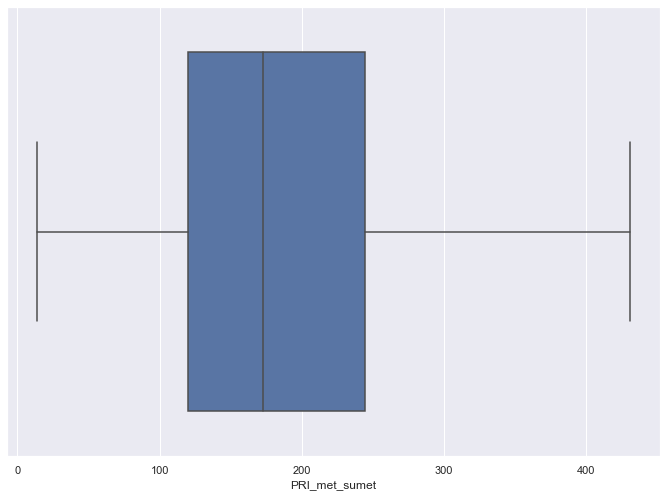

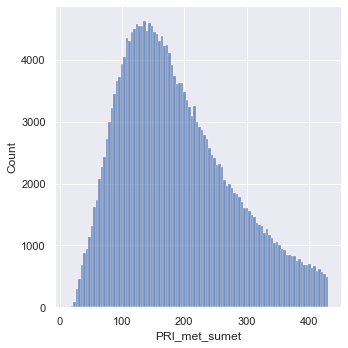

In [29]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['PRI_met_sumet'] < 431)]
sns.boxplot(dfTest['PRI_met_sumet'])
sns.displot(dfTest['PRI_met_sumet'])
print(dfTest['PRI_met_sumet'].max())
print(dfTest['PRI_met_sumet'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1120.573
-999.0


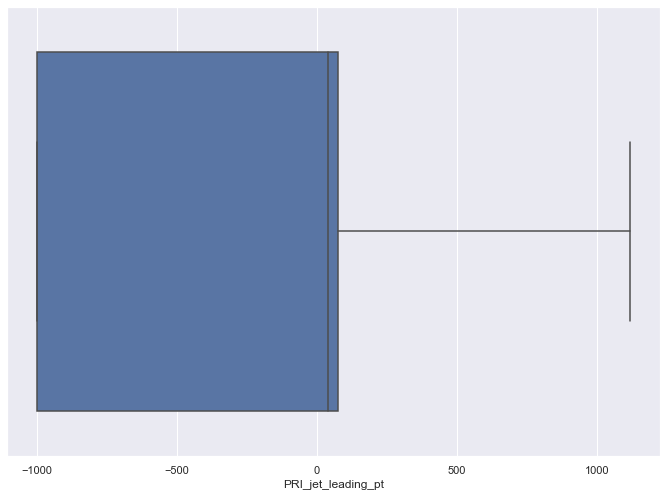

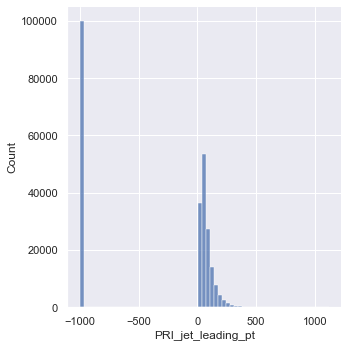

In [30]:
sns.boxplot(df['PRI_jet_leading_pt'])
sns.displot(df['PRI_jet_leading_pt'])
print(df['PRI_jet_leading_pt'].max())
print(df['PRI_jet_leading_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


157.996
30.0


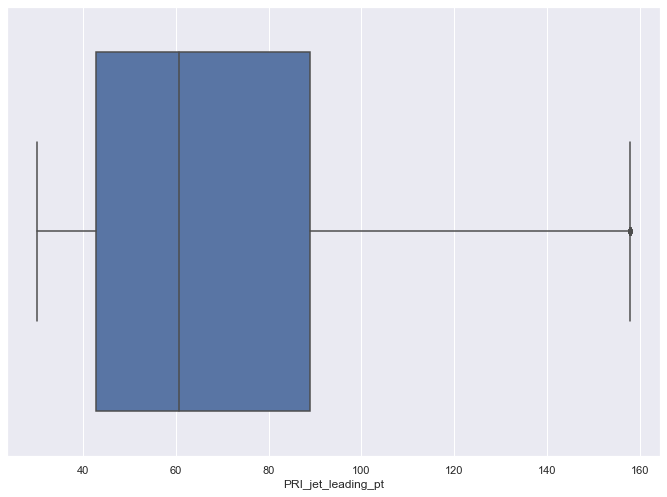

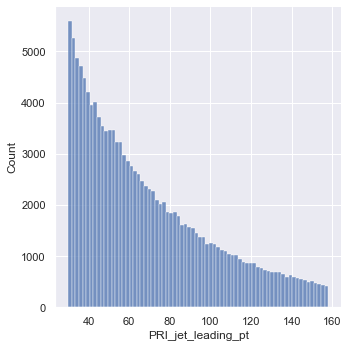

In [31]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['PRI_jet_leading_pt'] < 158) & (dfTest['PRI_jet_leading_pt'] > -5) ]
sns.boxplot(dfTest['PRI_jet_leading_pt'])
sns.displot(dfTest['PRI_jet_leading_pt'])
print(dfTest['PRI_jet_leading_pt'].max())
print(dfTest['PRI_jet_leading_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


721.456
-999.0


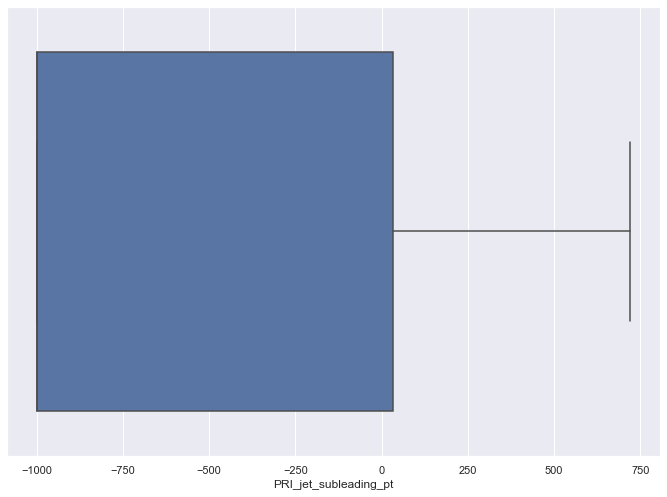

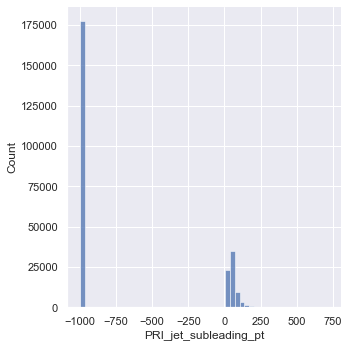

In [32]:
sns.boxplot(df['PRI_jet_subleading_pt'])
sns.displot(df['PRI_jet_subleading_pt'])
print(df['PRI_jet_subleading_pt'].max())
print(df['PRI_jet_subleading_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


93.99700000000001
30.0


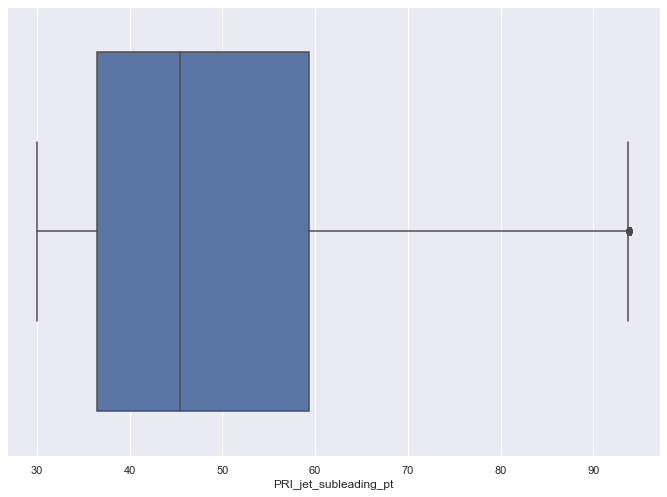

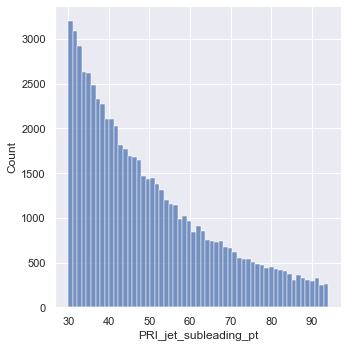

In [33]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['PRI_jet_subleading_pt'] < 94) & (dfTest['PRI_jet_subleading_pt'] > -5) ]
sns.boxplot(dfTest['PRI_jet_subleading_pt'])
sns.displot(dfTest['PRI_jet_subleading_pt'])
print(dfTest['PRI_jet_subleading_pt'].max())
print(dfTest['PRI_jet_subleading_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1633.433
0.0


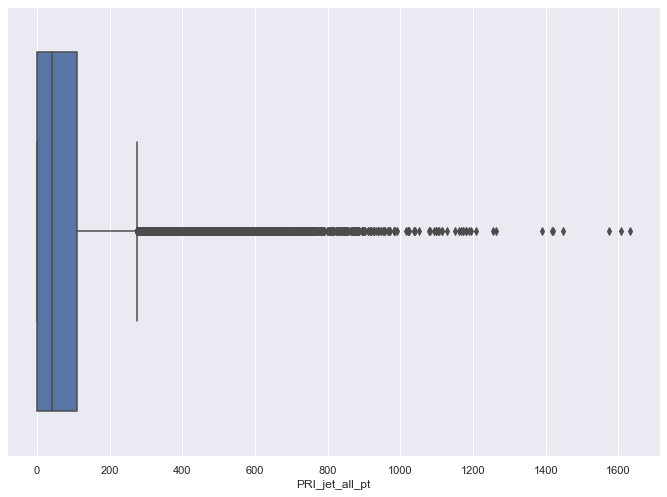

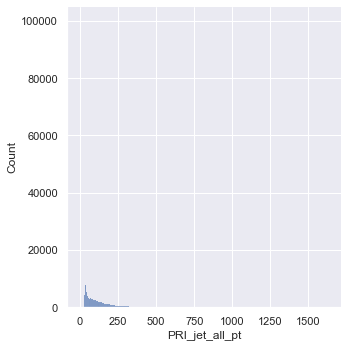

In [34]:
sns.boxplot(df['PRI_jet_all_pt'])
sns.displot(df['PRI_jet_all_pt'])
print(df['PRI_jet_all_pt'].max())
print(df['PRI_jet_all_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


282.991
30.0


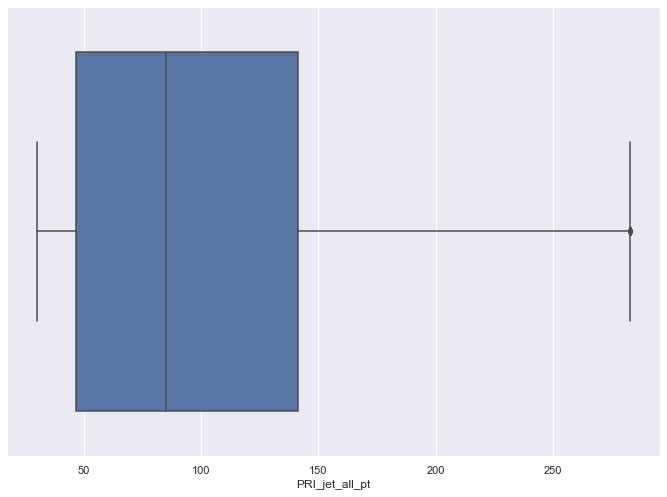

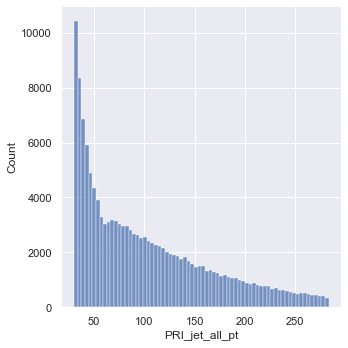

In [35]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['PRI_jet_all_pt'] < 283) & (dfTest['PRI_jet_all_pt'] > 0) ]
sns.boxplot(dfTest['PRI_jet_all_pt'])
sns.displot(dfTest['PRI_jet_all_pt'])
print(dfTest['PRI_jet_all_pt'].max())
print(dfTest['PRI_jet_all_pt'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


7.82254254503
0.00150187015894


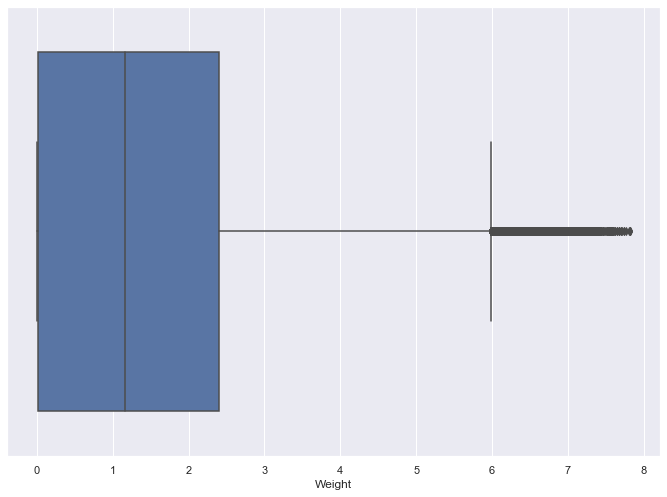

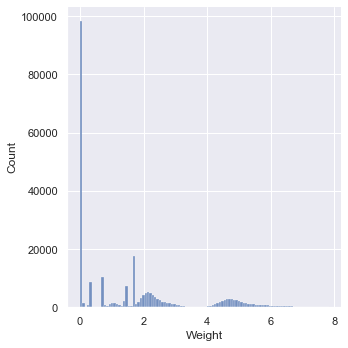

In [36]:
sns.boxplot(df['Weight'])
sns.displot(df['Weight'])
print(df['Weight'].max())
print(df['Weight'].min())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


7.82254254503
0.7144772151659999


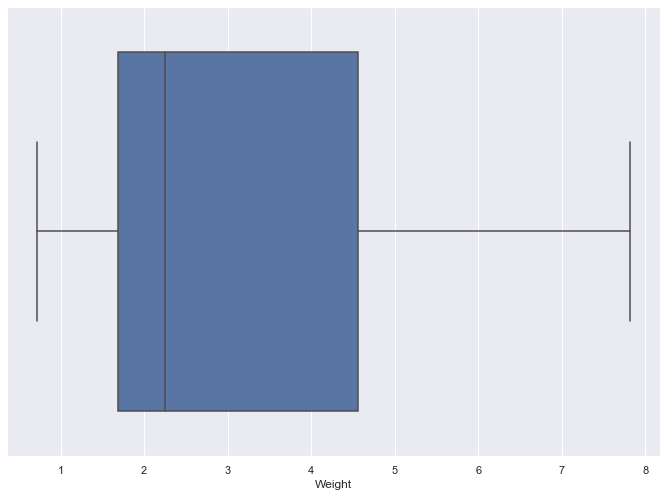

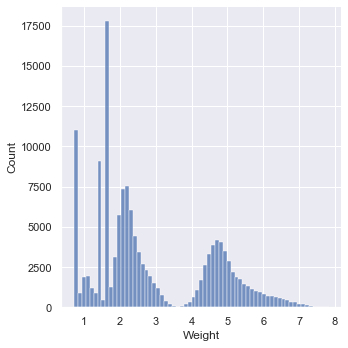

In [37]:
dfTest = df.copy()
dfTest = dfTest[(dfTest['Weight'] < 8) & (dfTest['Weight'] > 0.5) ]
sns.boxplot(dfTest['Weight'])
sns.displot(dfTest['Weight'])
print(dfTest['Weight'].max())
print(dfTest['Weight'].min())

In [38]:
df = df[
(df['DER_mass_MMC'] > 33) & (df['DER_mass_MMC'] < 188) &
(df['DER_mass_transverse_met_lep'] < 154) & 
(df['DER_mass_vis'] < 130) &
(df['DER_mass_vis'] > 15) &
(df['DER_pt_h'] < 148) &
(df['DER_mass_jet_jet'] < 685) &
(df['DER_mass_jet_jet'] > 0) &
(df['DER_pt_tot'] < 61) &
(df['DER_sum_pt'] < 325) &
(df['DER_pt_ratio_lep_tau'] < 3) &
(df['DER_lep_eta_centrality'] > -1) &
(df['PRI_tau_pt'] < 64) &
(df['PRI_lep_pt'] < 76) &
(df['PRI_met'] < 88) &
(df['PRI_met_sumet'] < 431) &
(df['PRI_jet_leading_pt'] < 158) & (df['PRI_jet_leading_pt'] > -5) &
(df['PRI_jet_subleading_pt'] < 94) & (df['PRI_jet_subleading_pt'] > -5) &
(df['PRI_jet_all_pt'] < 283) & (df['PRI_jet_all_pt'] > 0)
    ]

<AxesSubplot:>

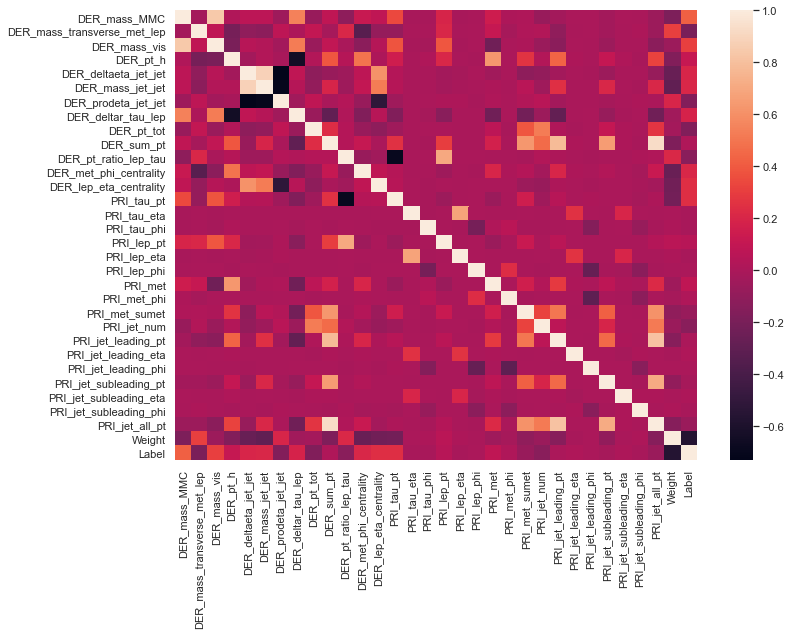

In [39]:
sns.heatmap(df.corr())

<AxesSubplot:>

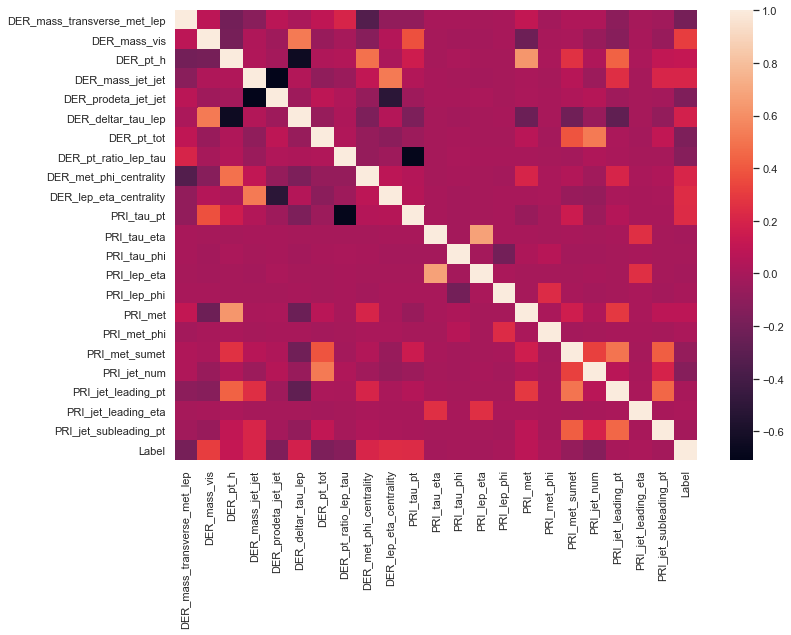

In [40]:
df = df.drop('DER_deltaeta_jet_jet',axis=1)
df = df.drop('PRI_jet_subleading_phi',axis=1)
df = df.drop('PRI_jet_subleading_eta',axis=1)
df = df.drop('PRI_jet_leading_phi',axis=1)
df = df.drop('DER_sum_pt',axis=1)
df = df.drop('PRI_jet_all_pt',axis=1)
df = df.drop('DER_mass_MMC',axis=1)
df = df.drop('PRI_lep_pt',axis=1)
df = df.drop('Weight',axis=1) #!
sns.heatmap(df.corr())

In [41]:
if PlotDeb == True:
    for i in df.columns: 
        sns.displot(df[i])

In [42]:
data = df.drop('Label',axis=1).copy()
target = df['Label']

In [43]:
RndF = RandomForestClassifier()
RndF.fit(data, target)

importance = RndF.feature_importances_
idx = np.argsort(importance)

for i in idx:
    print("%10s = %.3f" % (df.columns[i], importance[i]))
df = df.drop('PRI_jet_num',axis=1) 

PRI_jet_num = 0.006
PRI_met_phi = 0.027
PRI_lep_phi = 0.029
PRI_tau_phi = 0.029
PRI_jet_leading_eta = 0.029
PRI_lep_eta = 0.030
PRI_tau_eta = 0.030
PRI_jet_leading_pt = 0.030
PRI_jet_subleading_pt = 0.030
PRI_met_sumet = 0.032
DER_pt_ratio_lep_tau = 0.036
DER_pt_tot = 0.041
DER_prodeta_jet_jet = 0.042
  DER_pt_h = 0.049
DER_mass_transverse_met_lep = 0.055
DER_mass_jet_jet = 0.056
DER_lep_eta_centrality = 0.057
   PRI_met = 0.058
PRI_tau_pt = 0.058
DER_met_phi_centrality = 0.065
DER_deltar_tau_lep = 0.085
DER_mass_vis = 0.125


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.29, random_state=13)

In [45]:
NV = GaussianNB()
NV.fit(X_train, Y_train)

prob = NV.predict_proba(X_test)
pred = NV.predict(X_test)

print("Acc = ", accuracy_score(Y_test, pred))
print("ROC AUC = ", roc_auc_score(Y_test, prob[:, 1]))
print("F1 = ", f1_score(Y_test, pred))

Acc =  0.7287293503912557
ROC AUC =  0.7934556616726355
F1 =  0.6785398881365912


In [46]:
TRT = DecisionTreeClassifier(random_state=13)
features = df.copy().drop('Label',axis=1).columns.tolist()
params = {
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': [2,4,8,16],
}
grid = GridSearchCV(
    TRT, params, scoring='roc_auc',
    cv=3,
)
grid.fit(X_train, Y_train);
print(grid.best_params_)
TR = DecisionTreeClassifier(max_depth = 7,min_samples_split = 8,random_state=13)
TR.fit(X_train, Y_train)

prob = TR.predict_proba(X_test)
pred = TR.predict(X_test)

print("Acc = ", accuracy_score(Y_test, pred))
print("ROC AUC = ", roc_auc_score(Y_test, prob[:, 1]))
print("F1 = ", f1_score(Y_test, pred))

{'max_depth': 7, 'min_samples_split': 8}
Acc =  0.7448764128679667
ROC AUC =  0.8266141862911097
F1 =  0.7062356979405034


In [47]:
KNT = KNeighborsClassifier()
features = df.copy().drop('Label',axis=1).columns.tolist()
params = {
    'n_neighbors': np.arange(1, 100, 1),
}
grid = GridSearchCV(
    KNT, params, scoring='roc_auc',
    cv=3,n_jobs=-1
)
grid.fit(X_train, Y_train);
print(grid.best_params_)
KN = KNeighborsClassifier(n_neighbors=40)
KN.fit(X_train, Y_train)

prob = KN.predict_proba(X_test)
pred = KN.predict(X_test)

print("Acc = ", accuracy_score(Y_test, pred))
print("ROC AUC = ", roc_auc_score(Y_test, prob[:, 1]))
print("F1 = ", f1_score(Y_test, pred))

{'n_neighbors': 40}
Acc =  0.7179232393491491
ROC AUC =  0.7871762740972454
F1 =  0.6509912402028584


In [48]:
C = np.logspace(-100, 1, 100)
logr = LogisticRegressionCV(Cs=C, cv=3, scoring='roc_auc', random_state=0,solver="liblinear").fit(X_train, Y_train)
prob = logr.predict_proba(X_test)
pred = logr.predict(X_test)
print("Acc = ", accuracy_score(Y_test, pred))
print("ROC AUC = ", roc_auc_score(Y_test, prob[:, 1]))
print("F1 = ", f1_score(Y_test, pred))

Acc =  0.7374239224941002
ROC AUC =  0.8120871138487068
F1 =  0.6830584707646177


<b>Комментарий:</b> Ниже некоторые операции закомментированы чтобы программа слишком долго не считала, но при нормальной работе они должны быть выполнены

In [49]:
RndFT = RandomForestClassifier()
features = df.copy().drop('Label',axis=1).columns.tolist()
params = {
    'n_estimators': np.arange(1, 50, 1),
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': [2,4,8,16],
}
grid = GridSearchCV(
    RndF, params, scoring='roc_auc',
    cv=3,n_jobs=14
)
#grid.fit(X_train, Y_train);
#print(grid.best_params_)

RndF = RandomForestClassifier(max_depth=14,min_samples_split=4,n_estimators=50)

RndF.fit(X_train, Y_train)
prob = RndF.predict_proba(X_test)
pred = RndF.predict(X_test)

print("Acc = ", accuracy_score(Y_test, pred))
print("ROC AUC = ", roc_auc_score(Y_test, prob[:, 1]))
print("F1 = ", f1_score(Y_test, pred))

Acc =  0.7802757421438331
ROC AUC =  0.8599520761304037
F1 =  0.7351399910166193


In [50]:
BGcT = BaggingClassifier()
features = df.copy().drop('Label',axis=1).columns.tolist()
params = {
    'n_estimators': [100],
    'max_samples': np.arange(1, 100, 1), 
    'max_features': np.arange(1, 22, 1),
}
grid = GridSearchCV(
    BGcT, params, scoring='roc_auc',
    cv=3,n_jobs=14
)
#grid.fit(X_train, Y_train);
#print(grid.best_params_)
#{'max_features': 18, 'max_samples': 99, 'n_estimators': 100}
BGc = RandomForestClassifier(max_features=18,max_samples=99,n_estimators=100)

BGc.fit(X_train, Y_train)
prob = RndF.predict_proba(X_test)
pred = RndF.predict(X_test)

print("Acc = ", accuracy_score(Y_test, pred))
print("ROC AUC = ", roc_auc_score(Y_test, prob[:, 1]))
print("F1 = ", f1_score(Y_test, pred))

Acc =  0.7802757421438331
ROC AUC =  0.8599520761304037
F1 =  0.7351399910166193


In [51]:
clfT = xgb.XGBClassifier()
features = df.copy().drop('Label',axis=1).columns.tolist()
params = {
    'n_estimators': [1000],
    'learning_rate': np.arange(0.1, 5, 0.1), 
    'max_depth': np.arange(1, 10, 1),
}
grid = GridSearchCV(
    clfT, params, scoring='roc_auc',
    cv=3,n_jobs=14
)
#Подбор параметров выполнить неудалось
#grid.fit(X_train, Y_train)
#print(grid.best_params_)
clf = xgb.XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=1000)
clf.fit(X_train, Y_train)
prob = clf.predict_proba(X_test)
pred = clf.predict(X_test)
print("Acc = ", accuracy_score(Y_test, pred))
print("ROC AUC = ", roc_auc_score(Y_test, prob[:, 1]))
print("F1 = ", f1_score(Y_test, pred))

[16:28:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Acc =  0.7811451993541175
ROC AUC =  0.8591960045232763
F1 =  0.7435225618631733
